In [1]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [42]:
#text = open('read.txt', encoding='utf-8').read()
text='kaartick!! is from japan, innocent bad boy'
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
print(cleaned_text)
print(type(cleaned_text))


kaartick is from japan innocent bad boy
<class 'str'>


In [38]:
tokenized_words = word_tokenize(cleaned_text, "english")

In [39]:
tokenized_words

['kaartick', 'is', 'from', 'japan', 'innocent', 'bad', 'boy']

In [11]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)
final_words

['gowtham', 'bad', 'boy', 'bad', 'negative', 'guitar']

In [12]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)
lemma_words

['gowtham', 'bad', 'boy', 'bad', 'negative', 'guitar']

In [31]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

Negative Sentiment


In [36]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        #print(line)
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)


[]
Counter()


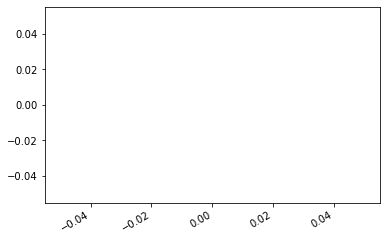

In [37]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()